### Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/nataliawijaya/Documents/Bootcamp/New York Citi Bikes/02 Data'

In [4]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'citibike_cleaned_exc2930_1.csv'), index_col = False)

In [5]:
df

,Unnamed: 0,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,start_day,end_year,end_month,end_week,end_day,end_hour,days_category,peak_hours,avg_trip_duration_each_hour,day_of_week
0,0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,...,9,2013,9,37,9,18,Weekdays,Peak hours,14.1,2
1,1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,...,12,2013,9,37,12,18,Weekdays,Peak hours,14.1,5
2,2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,...,18,2013,9,38,18,19,Weekdays,Peak hours,13.2,4
3,3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,...,28,2013,9,39,28,12,Weekend,Normal hours,14.0,7
4,4,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,...,7,2013,9,36,7,18,Weekend,Peak hours,14.1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46668,46668,17988,Sat,18,2013-09-21 18:39:20,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-21 20:08:59,...,21,2013,9,38,21,20,Weekend,Peak hours,14.1,7
46669,46669,18458,Sat,17,2013-09-14 17:32:26,261,Johnson St & Gold St,40.694749,-73.983625,2013-09-14 17:52:17,...,14,2013,9,37,14,17,Weekend,Peak hours,14.0,7
46670,46670,15054,Sat,18,2013-09-07 18:08:21,402,Broadway & E 22 St,40.740343,-73.989551,2013-09-07 18:25:51,...,7,2013,9,36,7,18,Weekend,Peak hours,14.1,7
46671,46671,16763,Sat,13,2013-09-07 13:25:35,271,Ashland Pl & Hanson Pl,40.685282,-73.978058,2013-09-07 14:14:04,...,7,2013,9,36,7,14,Weekend,Normal hours,13.7,7


In [6]:
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.head()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,...,start_day,end_year,end_month,end_week,end_day,end_hour,days_category,peak_hours,avg_trip_duration_each_hour,day_of_week
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,...,9,2013,9,37,9,18,Weekdays,Peak hours,14.1,2
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,...,12,2013,9,37,12,18,Weekdays,Peak hours,14.1,5
2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,...,18,2013,9,38,18,19,Weekdays,Peak hours,13.2,4
3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,...,28,2013,9,39,28,12,Weekend,Normal hours,14.0,7
4,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,...,7,2013,9,36,7,18,Weekend,Peak hours,14.1,7


In [8]:
df.shape

(46673, 32)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46673 entries, 0 to 46672
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   bike_id                      46673 non-null  int64  
 1   weekday                      46673 non-null  object 
 2   start_hour                   46673 non-null  int64  
 3   start_time                   46673 non-null  object 
 4   start_station_id             46673 non-null  int64  
 5   start_station_name           46673 non-null  object 
 6   start_station_latitude       46673 non-null  float64
 7   start_station_longitude      46673 non-null  float64
 8   end_time                     46673 non-null  object 
 9   end_station_id               46673 non-null  int64  
 10  end_station_name             46673 non-null  object 
 11  end_station_latitude         46673 non-null  float64
 12  end_station_longitude        46673 non-null  float64
 13  trip_duration   

In [10]:
df.describe()

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,...,start_month,start_week,start_day,end_year,end_month,end_week,end_day,end_hour,avg_trip_duration_each_hour,day_of_week
count,46673.000000,46673.000000,46673.000000,46673.000000,46673.000000,46673.000000,46673.000000,46673.000000,46673.000000,40191.000000,...,46673.0,46673.000000,46673.000000,46673.0,46673.0,46673.000000,46673.000000,46673.000000,46673.000000,46673.000000
mean,17611.710454,14.152722,442.692049,40.734262,-73.991118,442.403252,40.733940,-73.991364,838.269449,1975.608470,...,9.0,37.436719,15.029010,2013.0,9.0,37.437041,15.032867,14.313757,13.466152,4.100893
std,1674.680560,4.868148,355.257605,0.019883,0.012549,355.227714,0.019858,0.012552,572.795827,11.085518,...,0.0,1.152806,7.931816,0.0,0.0,1.152415,7.931520,4.918672,0.920047,1.948041
min,14556.000000,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1899.000000,...,9.0,35.000000,1.000000,2013.0,9.0,35.000000,1.000000,0.000000,10.200000,1.000000
25%,16188.000000,10.000000,304.000000,40.720434,-74.000271,304.000000,40.720196,-74.001547,418.000000,1968.000000,...,9.0,36.000000,8.000000,2013.0,9.0,36.000000,8.000000,11.000000,12.900000,2.000000
50%,17579.000000,15.000000,402.000000,40.736197,-73.990765,402.000000,40.735354,-73.991218,672.000000,1978.000000,...,9.0,37.000000,15.000000,2013.0,9.0,37.000000,15.000000,15.000000,13.500000,4.000000
75%,19014.000000,18.000000,484.000000,40.750073,-73.981923,483.000000,40.749156,-73.982050,1110.000000,1984.000000,...,9.0,38.000000,22.000000,2013.0,9.0,38.000000,22.000000,18.000000,14.100000,6.000000
max,20642.000000,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,1997.000000,...,9.0,39.000000,28.000000,2013.0,9.0,39.000000,29.000000,23.000000,14.700000,7.000000


In [11]:
# Check null values
df.isnull().sum()

bike_id                           0
weekday                           0
start_hour                        0
start_time                        0
start_station_id                  0
start_station_name                0
start_station_latitude            0
start_station_longitude           0
end_time                          0
end_station_id                    0
end_station_name                  0
end_station_latitude              0
end_station_longitude             0
trip_duration                     0
subscriber                        0
birth_year                     6482
gender                            0
gender_category                   0
trip_duration_min                 0
start_year                        0
start_month                       0
start_week                        0
start_day                         0
end_year                          0
end_month                         0
end_week                          0
end_day                           0
end_hour                    

### Feedback from 6.4
Quick tip regarding the "Start hour" x "Average trip duration": in the plot we can see there is some sort of relationship, it's just not linear.
One way of dealing with this would be to transform the X variable into categories:
- between 0 and 5 (a)
- between 5 and 15 (b)
- greater than 15 (c)

and have different regression models for each

#### In this case I will create a scatterplot for "Start hour" x "Average trip duration" with normal df (dataframe including those users who didn't input their birth of date)

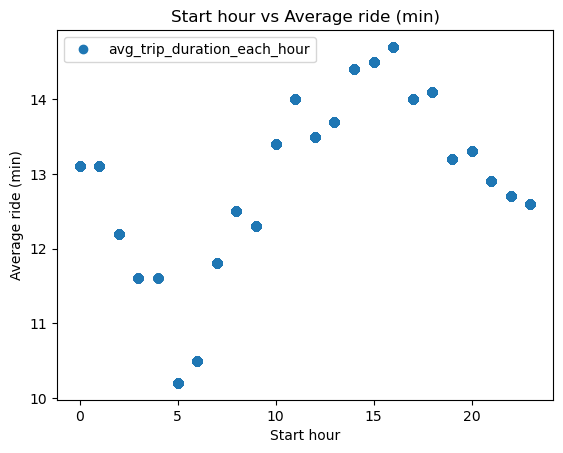

In [12]:
# Data prep for regression analysis
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'start_hour', y = 'avg_trip_duration_each_hour', style = 'o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Start hour vs Average ride (min)')  
plt.xlabel('Start hour')  
plt.ylabel('Average ride (min)')  
plt.show()

In [13]:
hours = []

for value in df['start_hour']:
    if value in [0, 1, 2, 3, 4, 5]:
        hours.append('0am - 5am')
    elif value in [6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
        hours.append('6am - 15pm')
    else:
        hours.append('16pm - 23pm')

In [14]:
df['hours_category'] = hours

In [15]:
df.head()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,...,end_year,end_month,end_week,end_day,end_hour,days_category,peak_hours,avg_trip_duration_each_hour,day_of_week,hours_category
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,...,2013,9,37,9,18,Weekdays,Peak hours,14.1,2,16pm - 23pm
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,...,2013,9,37,12,18,Weekdays,Peak hours,14.1,5,16pm - 23pm
2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,...,2013,9,38,18,19,Weekdays,Peak hours,13.2,4,16pm - 23pm
3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,...,2013,9,39,28,12,Weekend,Normal hours,14.0,7,6am - 15pm
4,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,...,2013,9,36,7,18,Weekend,Peak hours,14.1,7,16pm - 23pm


/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


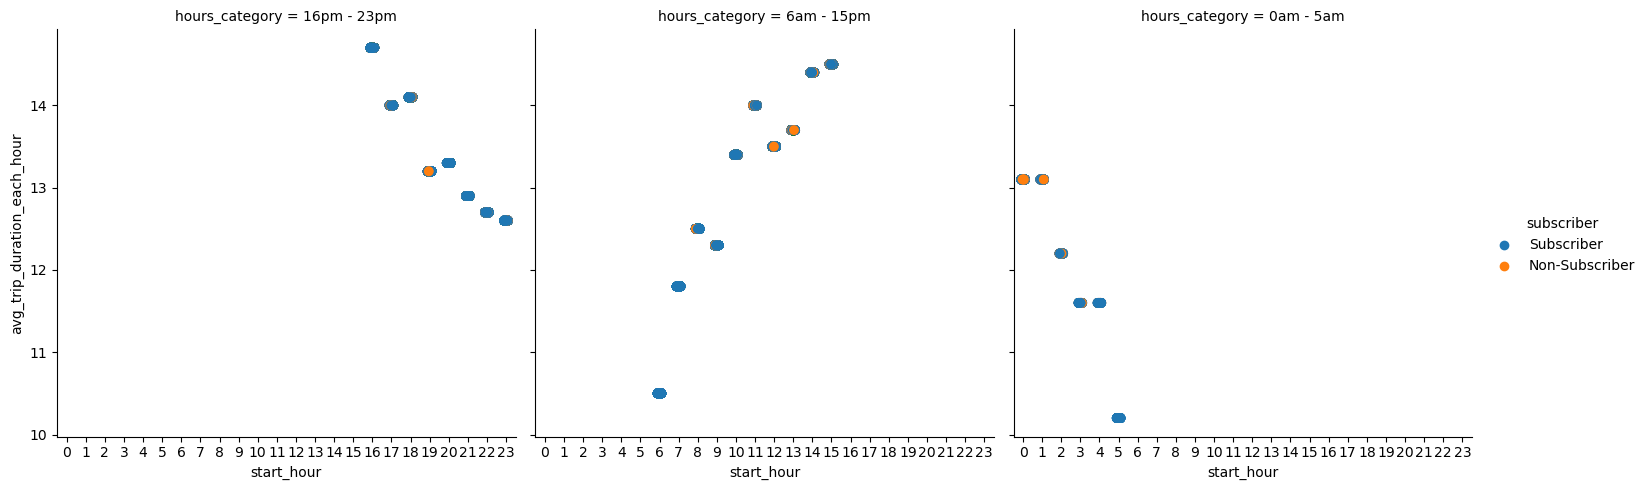

In [16]:
sns.catplot(
    data = df, x = 'start_hour',  y = 'avg_trip_duration_each_hour', col = 'hours_category', hue = 'subscriber' , aspect = 1, s = 50
)

#### Observation:
The above results are interesting because non-subscribers dominate the late hours of 0am and 1am

In [17]:
df_sub_a = df.loc[df['start_hour'].isin ([0, 1, 2, 3, 4, 5])]
df_sub_b = df.loc[df['start_hour'].isin ([6, 7, 8, 9, 10, 11, 12, 13, 14, 15])]
df_sub_c = df.loc[df['start_hour'].isin ([16, 17, 18, 19, 20, 21, 22, 23])]

In [18]:
df.shape

(46673, 33)

In [19]:
df_sub_a.shape

(1338, 33)

In [20]:
df_sub_b.shape

(23794, 33)

In [21]:
df_sub_c.shape

(21541, 33)

a + b + c

1338 + 23794 + 21541 = 46673

In [22]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### df_sub_a (between 0am and 5am)

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects
Xa = df_sub_a['start_hour'].values.reshape(-1,1)
ya = df_sub_a['avg_trip_duration_each_hour'].values.reshape(-1,1)

In [24]:
Xa

array([[2],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [25]:
ya

array([[12.2],
       [13.1],
       [13.1],
       ...,
       [13.1],
       [13.1],
       [13.1]])

In [26]:
# Split data into a training set and a test set

Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size = 0.3, random_state = 0)

In [27]:
# Regression analysis
# Create a regression object

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set

In [28]:
# Fit the regression object onto the training set

regression.fit(Xa_train, ya_train)

LinearRegression()

In [29]:
# Predict the values of y using X

ya_predicted = regression.predict(Xa_test)

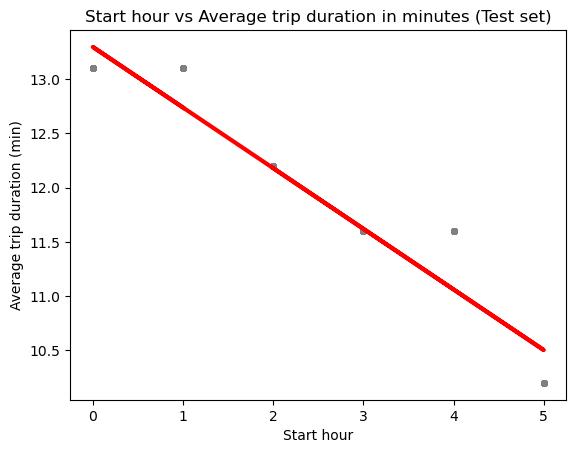

In [30]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(Xa_test, ya_test, color = 'gray', s = 15)
plot_test.plot(Xa_test, ya_predicted, color = 'red', linewidth =3)
plot_test.title('Start hour vs Average trip duration in minutes (Test set)')
plot_test.xlabel('Start hour')
plot_test.ylabel('Average trip duration (min)')
plot_test.show()

In [31]:
# Create objects that contain the model summary statistics.

rmse_a = mean_squared_error(ya_test, ya_predicted) # This is the mean squared error
r2_a = r2_score(ya_test, ya_predicted) # This is the R2 score. 

In [32]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_a)
print('R2 score: ', r2_a)

Slope: [[-0.55857097]]
Mean squared error:  0.07411012407060004
R2 score:  0.9297626773400101


In [33]:
ya_predicted

array([[12.7372448 ],
       [13.29581577],
       [12.7372448 ],
       [12.7372448 ],
       [12.7372448 ],
       [13.29581577],
       [13.29581577],
       [11.62010286],
       [12.7372448 ],
       [12.17867383],
       [10.50296093],
       [13.29581577],
       [12.7372448 ],
       [13.29581577],
       [10.50296093],
       [12.7372448 ],
       [13.29581577],
       [11.62010286],
       [13.29581577],
       [11.06153189],
       [13.29581577],
       [12.17867383],
       [13.29581577],
       [13.29581577],
       [10.50296093],
       [13.29581577],
       [12.7372448 ],
       [12.7372448 ],
       [11.62010286],
       [10.50296093],
       [10.50296093],
       [10.50296093],
       [12.17867383],
       [12.7372448 ],
       [12.7372448 ],
       [13.29581577],
       [11.06153189],
       [12.7372448 ],
       [12.7372448 ],
       [11.62010286],
       [13.29581577],
       [13.29581577],
       [13.29581577],
       [12.7372448 ],
       [10.50296093],
       [12

In [34]:
# Create a dataframe comparing the actual and predicted values of y

df_a_ap = pd.DataFrame({'Actual': ya_test.flatten(), 'Predicted': ya_predicted.flatten()})
df_a_ap.head(30)

,Actual,Predicted
0,13.1,12.737245
1,13.1,13.295816
2,13.1,12.737245
3,13.1,12.737245
4,13.1,12.737245
5,13.1,13.295816
6,13.1,13.295816
7,11.6,11.620103
8,13.1,12.737245
9,12.2,12.178674


In [35]:
# Compare how the regression fits the training set
# Predict

ya_predicted_train = regression.predict(Xa_train) # This is predicting X_train!

In [36]:
rmse_a = mean_squared_error(ya_train, ya_predicted_train)
r2_a = r2_score(ya_train, ya_predicted_train)

In [37]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_a)
print('R2 score: ', r2_a)

Slope: [[-0.55857097]]
Mean squared error:  0.0751069252654511
R2 score:  0.9306410061231679


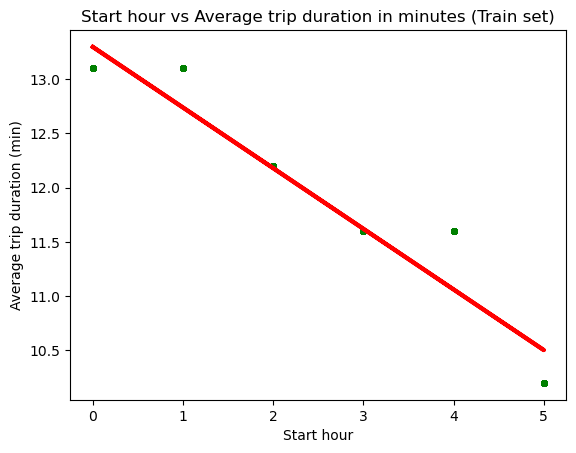

In [38]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(Xa_train, ya_train, color='green', s = 15)
plot_test.plot(Xa_train, ya_predicted_train, color='red', linewidth =3)
plot_test.title('Start hour vs Average trip duration in minutes (Train set)')
plot_test.xlabel('Start hour')
plot_test.ylabel('Average trip duration (min)')
plot_test.show()

#### df_sub_b (between 5am and 15pm)

In [39]:
# Reshape the variables into NumPy arrays and put them into separate objects
Xb = df_sub_b['start_hour'].values.reshape(-1,1)
yb = df_sub_b['avg_trip_duration_each_hour'].values.reshape(-1,1)

In [40]:
Xb

array([[11],
       [10],
       [12],
       ...,
       [ 8],
       [15],
       [13]])

In [41]:
yb

array([[14. ],
       [13.4],
       [13.5],
       ...,
       [12.5],
       [14.5],
       [13.7]])

In [42]:
# Split data into a training set and a test set

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size = 0.3, random_state = 0)

In [43]:
# Fit the regression object onto the training set

regression.fit(Xb_train, yb_train)

LinearRegression()

In [44]:
# Predict the values of y using X

yb_predicted = regression.predict(Xb_test)

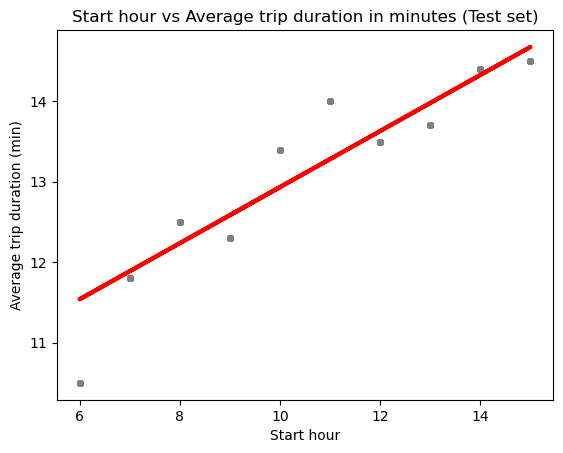

In [45]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(Xb_test, yb_test, color = 'gray', s = 15)
plot_test.plot(Xb_test, yb_predicted, color = 'red', linewidth =3)
plot_test.title('Start hour vs Average trip duration in minutes (Test set)')
plot_test.xlabel('Start hour')
plot_test.ylabel('Average trip duration (min)')
plot_test.show()

In [46]:
# Create objects that contain the model summary statistics.

rmse_b = mean_squared_error(yb_test, yb_predicted) # This is the mean squared error
r2_b = r2_score(yb_test, yb_predicted) # This is the R2 score. 

In [47]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_b)
print('R2 score: ', r2_b)

Slope: [[0.34853688]]
Mean squared error:  0.13821119773370932
R2 score:  0.8673754445802933


In [48]:
yb_predicted

array([[12.58494243],
       [13.97908995],
       [12.23640555],
       ...,
       [12.58494243],
       [12.23640555],
       [12.93347931]])

In [49]:
# Create a dataframe comparing the actual and predicted values of y

df_b_ap = pd.DataFrame({'Actual': yb_test.flatten(), 'Predicted': yb_predicted.flatten()})
df_b_ap.head(30)

,Actual,Predicted
0,12.3,12.584942
1,13.7,13.979090
2,12.5,12.236406
3,12.3,12.584942
4,13.5,13.630553
5,12.5,12.236406
6,12.5,12.236406
7,14.5,14.676164
8,14.0,13.282016
9,12.5,12.236406


In [50]:
# Compare how the regression fits the training set
# Predict

yb_predicted_train = regression.predict(Xb_train) # This is predicting X_train!

In [51]:
rmse_b = mean_squared_error(yb_train, yb_predicted_train)
r2_b = r2_score(yb_train, yb_predicted_train)

In [52]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_b)
print('R2 score: ', r2_b)

Slope: [[0.34853688]]
Mean squared error:  0.13644359976542164
R2 score:  0.8698383653285413


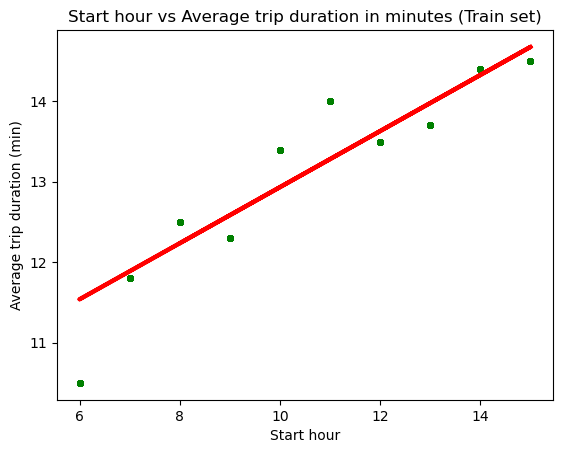

In [53]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(Xb_train, yb_train, color='green', s = 15)
plot_test.plot(Xb_train, yb_predicted_train, color='red', linewidth =3)
plot_test.title('Start hour vs Average trip duration in minutes (Train set)')
plot_test.xlabel('Start hour')
plot_test.ylabel('Average trip duration (min)')
plot_test.show()

#### df_sub_c (>15pm)

In [54]:
# Reshape the variables into NumPy arrays and put them into separate objects
Xc = df_sub_c['start_hour'].values.reshape(-1,1)
yc = df_sub_c['avg_trip_duration_each_hour'].values.reshape(-1,1)

In [55]:
Xc

array([[18],
       [18],
       [19],
       ...,
       [17],
       [18],
       [21]])

In [56]:
yc

array([[14.1],
       [14.1],
       [13.2],
       ...,
       [14. ],
       [14.1],
       [12.9]])

In [57]:
# Split data into a training set and a test set

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size = 0.3, random_state = 0)

In [58]:
# Fit the regression object onto the training set

regression.fit(Xc_train, yc_train)

LinearRegression()

In [59]:
# Predict the values of y using X

yc_predicted = regression.predict(Xc_test)

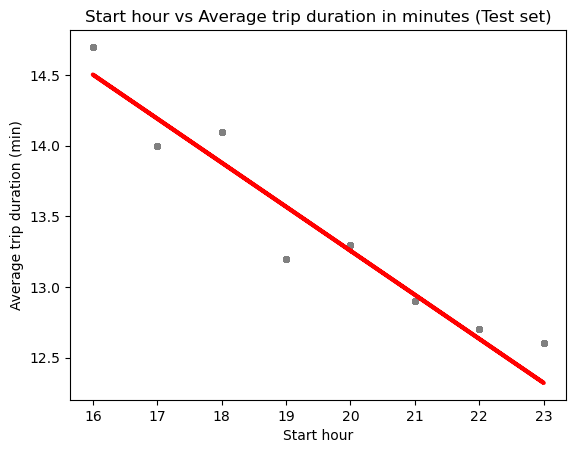

In [60]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(Xc_test, yc_test, color = 'gray', s = 15)
plot_test.plot(Xc_test, yc_predicted, color = 'red', linewidth =3)
plot_test.title('Start hour vs Average trip duration in minutes (Test set)')
plot_test.xlabel('Start hour')
plot_test.ylabel('Average trip duration (min)')
plot_test.show()

In [61]:
# Create objects that contain the model summary statistics.

rmse_c = mean_squared_error(yc_test, yc_predicted) # This is the mean squared error
r2_c = r2_score(yc_test, yc_predicted) # This is the R2 score. 

In [62]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_c)
print('R2 score: ', r2_c)

Slope: [[-0.31204471]]
Mean squared error:  0.04744469254299047
R2 score:  0.8856593604873697


In [63]:
yc_predicted

array([[13.25605425],
       [12.31992012],
       [13.25605425],
       ...,
       [13.88014367],
       [13.88014367],
       [13.25605425]])

In [64]:
# Create a dataframe comparing the actual and predicted values of y

df_c_ap = pd.DataFrame({'Actual': yc_test.flatten(), 'Predicted': yc_predicted.flatten()})
df_c_ap.head(30)

,Actual,Predicted
0,13.3,13.256054
1,12.6,12.319920
2,13.3,13.256054
3,14.1,13.880144
4,12.7,12.631965
5,12.7,12.631965
6,14.0,14.192188
7,12.6,12.319920
8,14.0,14.192188
9,14.7,14.504233


In [65]:
# Compare how the regression fits the training set
# Predict

yc_predicted_train = regression.predict(Xc_train) # This is predicting X_train!

In [66]:
rmse_c = mean_squared_error(yc_train, yc_predicted_train)
r2_c = r2_score(yc_train, yc_predicted_train)

In [67]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_c)
print('R2 score: ', r2_c)

Slope: [[-0.31204471]]
Mean squared error:  0.047943875058626295
R2 score:  0.8852128755361695


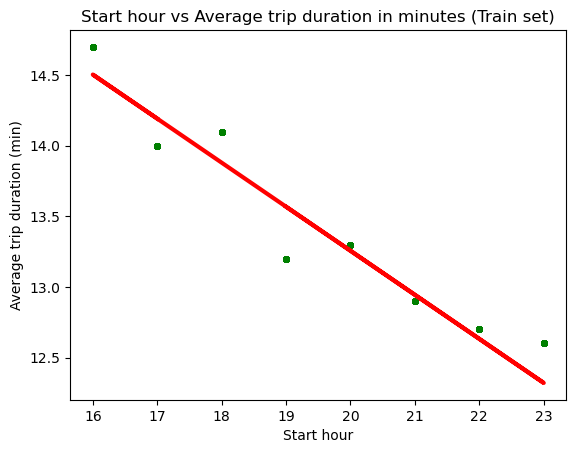

In [68]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(Xc_train, yc_train, color='green', s = 15)
plot_test.plot(Xc_train, yc_predicted_train, color='red', linewidth =3)
plot_test.title('Start hour vs Average trip duration in minutes (Train set)')
plot_test.xlabel('Start hour')
plot_test.ylabel('Average trip duration (min)')
plot_test.show()

#### Conclusion:
The regression analysis shows a linear relationship that changes direction
- Positive relationship: it starts increasing at 6:00 and reaches maximum at 15:00
- Negative relationship: it starts decreasing at 16:00 and reaches minimum at 5:00

There are indications that the ride duration has a relationship with ride start time
- From 06:00 - 15.00: trip duration increases as the start time progresses
- From 16:00 - 05:00: trip duration decreases as the start time progresses

Of all 3 time frames
- They produce small Mean Square Errors (MSE) on testing and training set
- They produce values close to 1 for the R2 score
- Actual and predicted values appear to be good

The relatively low MSE and high R-squared score indicate that the model predictions are close to the actual value so that the average trip duration can be explained by the start time variable.

### Additional Analysis

/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


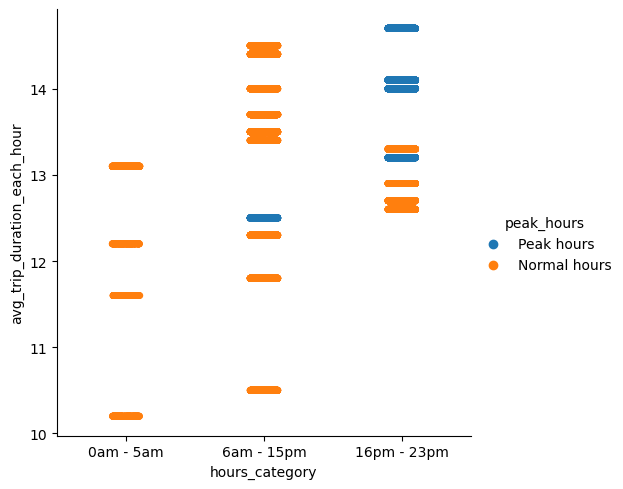

In [69]:
sns.catplot(
    data = df, x = 'hours_category',  y = 'avg_trip_duration_each_hour', hue = 'peak_hours', order = ['0am - 5am', '6am - 15pm', '16pm - 23pm']
)

/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


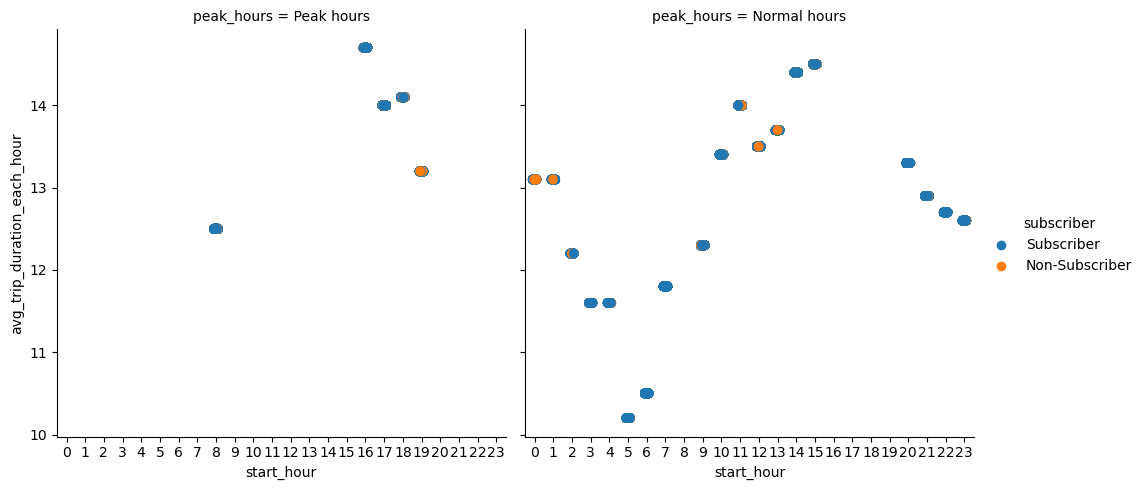

In [70]:
sns.catplot(
    data = df, x = 'start_hour',  y = 'avg_trip_duration_each_hour', col = 'peak_hours', hue = 'subscriber', aspect = 1, s = 50
)

/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


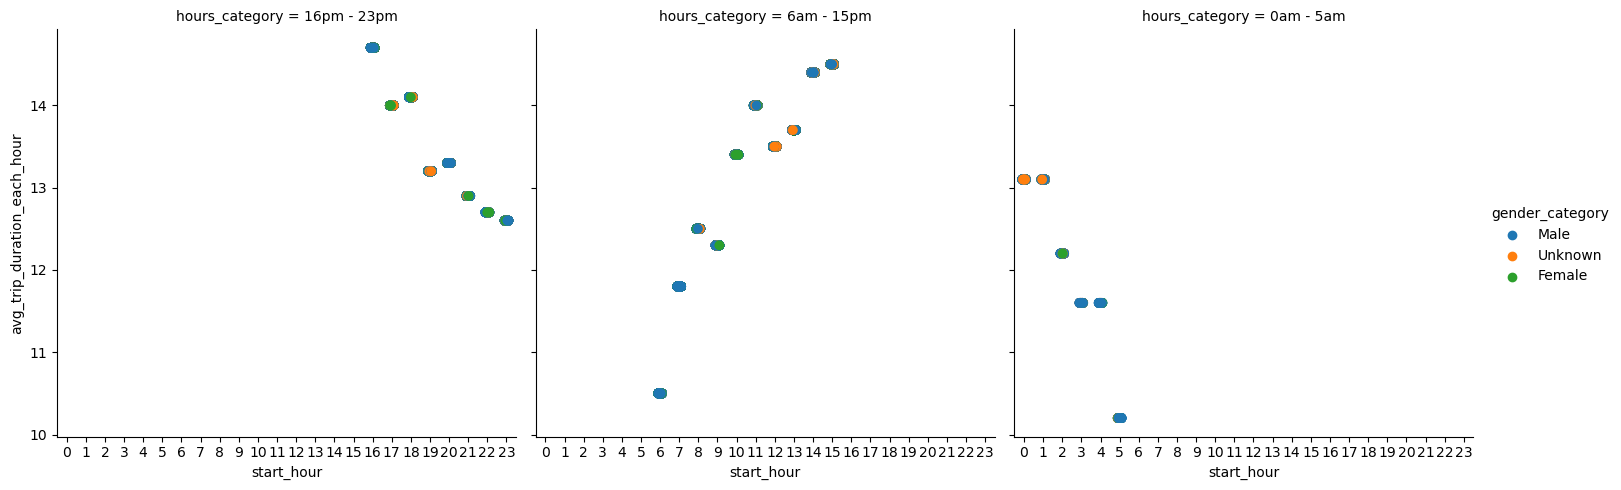

In [71]:

sns.catplot(
    data = df, x = 'start_hour',  y = 'avg_trip_duration_each_hour', hue = 'gender_category', col = 'hours_category' , aspect = 1, s = 50
)

### Exporting

In [73]:
df_sub_a.to_csv(os.path.join(path, 'Prepared Data', 'citibike_sub_a.csv'))
df_sub_b.to_csv(os.path.join(path, 'Prepared Data', 'citibike_sub_b.csv'))
df_sub_c.to_csv(os.path.join(path, 'Prepared Data', 'citibike_sub_c.csv'))